In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [85]:
gnns_df = pd.read_csv('../reports/results/sns-friendly/gnns.csv')
baseline_df = pd.read_csv('../reports/results/sns-friendly/baseline.csv')

In [86]:
gnns_df.head()

,conv,dataset,flow,test_acc,Network
0,GCNConv,cora,SYM,0.782670,original
1,GCNConv,cora,SYM,0.768150,original
2,GCNConv,cora,SYM,0.788759,original
3,GCNConv,cora,SYM,0.776581,original
4,GCNConv,cora,SYM,0.753162,original


In [87]:
for entry in gnns_df[gnns_df.dataset=='cora_full'].groupby(['dataset', 'conv', 'flow', 'Network']).groups:
    print(entry)

('cora_full', 'GATConv', 'SYM', 'conf')
('cora_full', 'GATConv', 'SYM', 'original')
('cora_full', 'GATConv', 'SYM', 'random')
('cora_full', 'GATConv', 'SYM', 'sbm')
('cora_full', 'GCNConv', 'SYM', 'conf')
('cora_full', 'GCNConv', 'SYM', 'original')
('cora_full', 'GCNConv', 'SYM', 'random')
('cora_full', 'GCNConv', 'SYM', 'sbm')
('cora_full', 'SAGEConv', 'SYM', 'conf')
('cora_full', 'SAGEConv', 'SYM', 'original')
('cora_full', 'SAGEConv', 'SYM', 'random')
('cora_full', 'SAGEConv', 'SYM', 'sbm')


In [88]:
gnns_df.groupby(['dataset', 'conv', 'flow', 'Network']).ngroups

92

In [90]:
arr1 = gnns_df[(gnns_df.dataset=='cora')&(gnns_df.conv=='GATConv')&(gnns_df.flow=='SYM')&(gnns_df.Network=='original')].test_acc.values

In [91]:
arr2 = baseline_df[baseline_df.dataset=='cora'].test_acc.values

In [92]:
_, p_value = stats.ttest_ind(arr1, arr2, equal_var=False)

In [93]:
p_value

4.521912231115878e-107

In [109]:
baseline_df.head()

,dataset,method,test_acc
0,cora,baseline,0.596253
1,cora,baseline,0.589696
2,cora,baseline,0.608431
3,cora,baseline,0.574707
4,cora,baseline,0.591101


In [112]:
for entry in baseline_df.groupby(['dataset', 'method']).groups:
    print(entry)

('citeseer', 'baseline')
('cora', 'baseline')
('cora_full', 'baseline')
('pubmed', 'baseline')
('twitter', 'baseline')
('webkb', 'baseline')


In [122]:
statistical_significances = []
for entry in gnns_df.groupby(['dataset', 'conv', 'flow', 'Network']).groups:
    baseline_values = baseline_df[baseline_df.dataset==entry[0]].test_acc.values
    approach_values = gnns_df[(gnns_df.dataset==entry[0])&(gnns_df.conv==entry[1])&(gnns_df.flow==entry[2])&(gnns_df.Network==entry[3])].test_acc.values
    _, p_value = stats.mannwhitneyu(baseline_values, approach_values)
    baseline_mean = np.mean(baseline_values)
    approach_mean = np.mean(approach_values)
    num_significance_tests = len(gnns_df[gnns_df.dataset==entry[0]].groupby(['dataset', 'conv', 'flow', 'Network']))
    alpha = 0.001
    _, p_value_normal_baseline = stats.normaltest(baseline_values)
    _, p_value_normal_approach = stats.normaltest(approach_values)
    statistical_significances.append({
        'dataset':entry[0],
        'conv':entry[1],
        'flow':entry[2],
        'Network':entry[3],
        'Baseline normal':p_value_normal_baseline>alpha,
        'Approach normal:':p_value_normal_approach>alpha,
        'p-value':p_value,
        'p-value<0.05':p_value<0.05,
        'p-value<0.05 (Bonferroni)':p_value<(0.05/num_significance_tests),
        'p-value<0.01':p_value<0.01,
        'p-value<0.01 (Bonferroni)':p_value<(0.01/num_significance_tests),
        'Baseline mean':baseline_mean,
        'Approach mean':approach_mean,
        'Beats baseline':approach_mean>baseline_mean
    })

In [132]:
statistical_significances_df = pd.DataFrame(statistical_significances)

In [133]:
statistical_significances_df[(statistical_significances_df.Network=='original')]

,dataset,conv,flow,Network,Baseline normal,Approach normal:,p-value,p-value<0.05,p-value<0.05 (Bonferroni),p-value<0.01,p-value<0.01 (Bonferroni),Baseline mean,Approach mean,Beats baseline
1,citeseer,GATConv,SYM,original,True,False,2.485297e-64,True,True,True,True,0.620215,0.733422,True
5,citeseer,GCNConv,SYM,original,True,False,3.481890e-64,True,True,True,True,0.620215,0.721310,True
9,citeseer,RGCNConv,SYM,original,True,False,1.045958e-32,True,True,True,True,0.620215,0.652624,True
13,citeseer,SAGEConv,SYM,original,True,False,3.282449e-64,True,True,True,True,0.620215,0.722808,True
17,cora,GATConv,SYM,original,True,False,2.893788e-64,True,True,True,True,0.579129,0.803943,True
21,cora,GCNConv,SYM,original,True,False,2.267290e-64,True,True,True,True,0.579129,0.812407,True
25,cora,RGCNConv,SYM,original,True,False,2.272834e-64,True,True,True,True,0.579129,0.774159,True
29,cora,SAGEConv,SYM,original,True,False,2.266532e-64,True,True,True,True,0.579129,0.811377,True
33,cora_full,GATConv,SYM,original,True,False,2.288103e-64,True,True,True,True,0.408393,0.549928,True
37,cora_full,GCNConv,SYM,original,True,False,2.286974e-64,True,True,True,True,0.408393,0.547800,True


In [134]:
statistical_significances_df[(statistical_significances_df.Network=='conf')]

,dataset,conv,flow,Network,Baseline normal,Approach normal:,p-value,p-value<0.05,p-value<0.05 (Bonferroni),p-value<0.01,p-value<0.01 (Bonferroni),Baseline mean,Approach mean,Beats baseline
0,citeseer,GATConv,SYM,conf,True,False,3.232963e-66,True,True,True,True,0.620215,0.305712,False
4,citeseer,GCNConv,SYM,conf,True,False,3.219721e-66,True,True,True,True,0.620215,0.336563,False
8,citeseer,RGCNConv,SYM,conf,True,False,4.519927e-66,True,True,True,True,0.620215,0.478615,False
12,citeseer,SAGEConv,SYM,conf,True,False,3.221248e-66,True,True,True,True,0.620215,0.306396,False
16,cora,GATConv,SYM,conf,True,False,2.815627e-66,True,True,True,True,0.579129,0.298237,False
20,cora,GCNConv,SYM,conf,True,False,3.224425e-66,True,True,True,True,0.579129,0.342614,False
24,cora,RGCNConv,SYM,conf,True,False,3.505218e-67,True,True,True,True,0.579129,0.428291,False
28,cora,SAGEConv,SYM,conf,True,False,3.211069e-66,True,True,True,True,0.579129,0.317016,False
32,cora_full,GATConv,SYM,conf,True,False,3.243450e-66,True,True,True,True,0.408393,0.048338,False
36,cora_full,GCNConv,SYM,conf,True,False,3.243650e-66,True,True,True,True,0.408393,0.039449,False


In [135]:
statistical_significances_df[(statistical_significances_df.Network=='sbm')]

,dataset,conv,flow,Network,Baseline normal,Approach normal:,p-value,p-value<0.05,p-value<0.05 (Bonferroni),p-value<0.01,p-value<0.01 (Bonferroni),Baseline mean,Approach mean,Beats baseline
3,citeseer,GATConv,SYM,sbm,True,False,1.541219e-03,True,True,True,False,0.620215,0.625449,True
7,citeseer,GCNConv,SYM,sbm,True,False,8.772285e-09,True,True,True,True,0.620215,0.605416,False
11,citeseer,RGCNConv,SYM,sbm,True,False,3.018275e-01,False,False,False,False,0.620215,0.613430,False
15,citeseer,SAGEConv,SYM,sbm,True,False,4.438684e-01,False,False,False,False,0.620215,0.618895,False
19,cora,GATConv,SYM,sbm,True,False,4.865528e-01,False,False,False,False,0.579129,0.574802,False
23,cora,GCNConv,SYM,sbm,True,False,6.303836e-42,True,True,True,True,0.579129,0.624350,True
27,cora,RGCNConv,SYM,sbm,True,False,1.451711e-09,True,True,True,True,0.579129,0.581390,True
31,cora,SAGEConv,SYM,sbm,True,False,7.138560e-42,True,True,True,True,0.579129,0.629311,True
35,cora_full,GATConv,SYM,sbm,True,False,3.243826e-66,True,True,True,True,0.408393,0.274743,False
39,cora_full,GCNConv,SYM,sbm,True,False,3.243529e-66,True,True,True,True,0.408393,0.302353,False


In [136]:
statistical_significances_df[(statistical_significances_df.Network=='random')]

,dataset,conv,flow,Network,Baseline normal,Approach normal:,p-value,p-value<0.05,p-value<0.05 (Bonferroni),p-value<0.01,p-value<0.01 (Bonferroni),Baseline mean,Approach mean,Beats baseline
2,citeseer,GATConv,SYM,random,True,False,3.223572e-66,True,True,True,True,0.620215,0.361907,False
6,citeseer,GCNConv,SYM,random,True,False,3.215275e-66,True,True,True,True,0.620215,0.360052,False
10,citeseer,RGCNConv,SYM,random,True,False,1.045638e-38,True,True,True,True,0.620215,0.566544,False
14,citeseer,SAGEConv,SYM,random,True,False,3.217592e-66,True,True,True,True,0.620215,0.361956,False
18,cora,GATConv,SYM,random,True,False,3.205836e-66,True,True,True,True,0.579129,0.324144,False
22,cora,GCNConv,SYM,random,True,False,3.210843e-66,True,True,True,True,0.579129,0.340811,False
26,cora,RGCNConv,SYM,random,True,False,3.461191e-66,True,True,True,True,0.579129,0.405868,False
30,cora,SAGEConv,SYM,random,True,False,3.215200e-66,True,True,True,True,0.579129,0.341885,False
34,cora_full,GATConv,SYM,random,True,False,3.237502e-66,True,True,True,True,0.408393,0.018075,False
38,cora_full,GCNConv,SYM,random,True,False,3.243459e-66,True,True,True,True,0.408393,0.056094,False


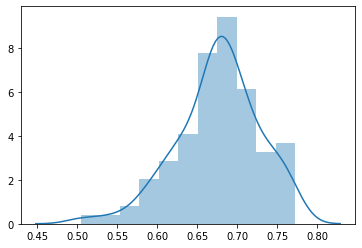

In [137]:
sns.distplot(baseline_values)

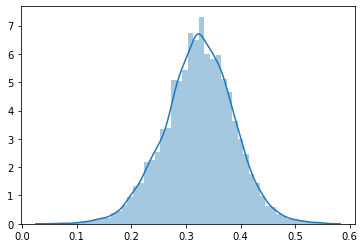

In [138]:
sns.distplot(approach_values)

In [139]:
stats.normaltest(baseline_values)

NormaltestResult(statistic=6.726000145794835, pvalue=0.03463120679585246)

In [140]:
stats.normaltest(approach_values)

NormaltestResult(statistic=130.49594931866903, pvalue=4.604310995202344e-29)